                              Health Insurance Prediction: Multiple Linear Regression 

In [1]:
import os
os.getcwd()
os.listdir()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
insurance = pd.read_csv(r'/Users/veere/Downloads/insurance (1).csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.shape

(1338, 7)

In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
insurance.isnull().sum()
#lets checķ for any missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

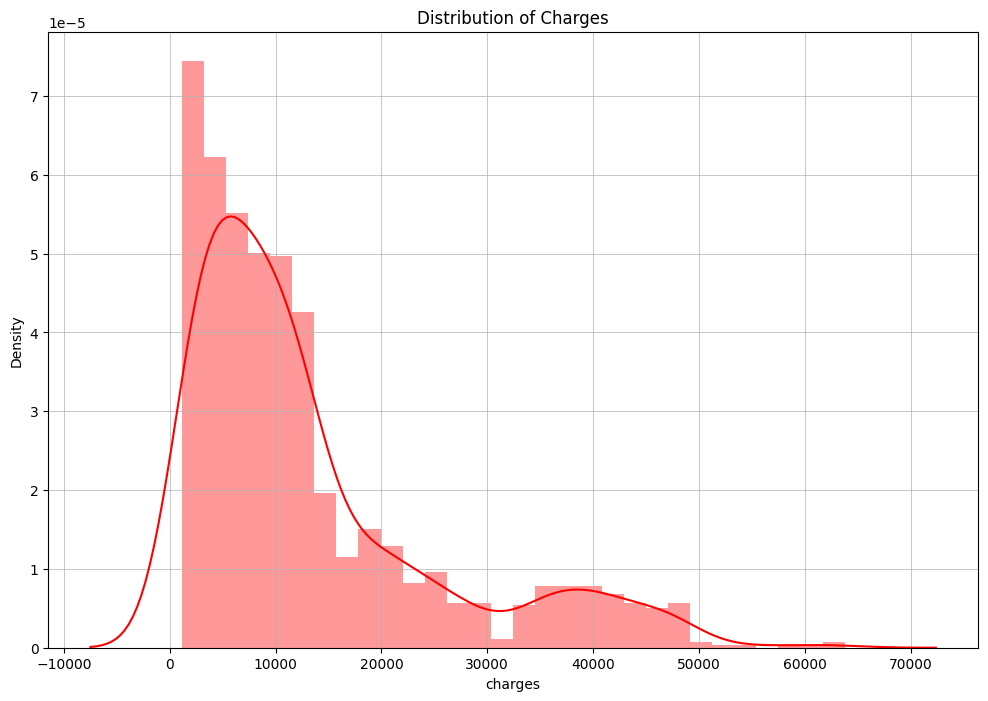

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(insurance['charges'], kde = True, color = 'r')
plt.title('Distribution of Charges')
plt.grid(linewidth=0.5)
#lets check for distribution of charges

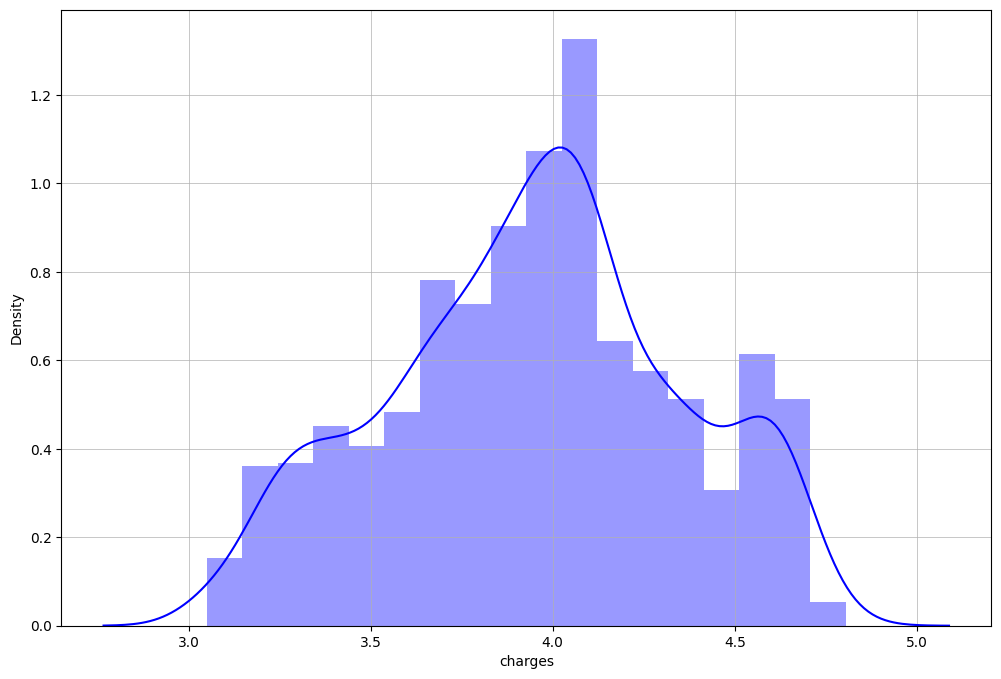

In [7]:
#as it is right skewed, lets apply log 
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1 = sns.distplot(np.log10(insurance['charges']), kde = True, color = 'b' )
plt.grid(linewidth=0.5)

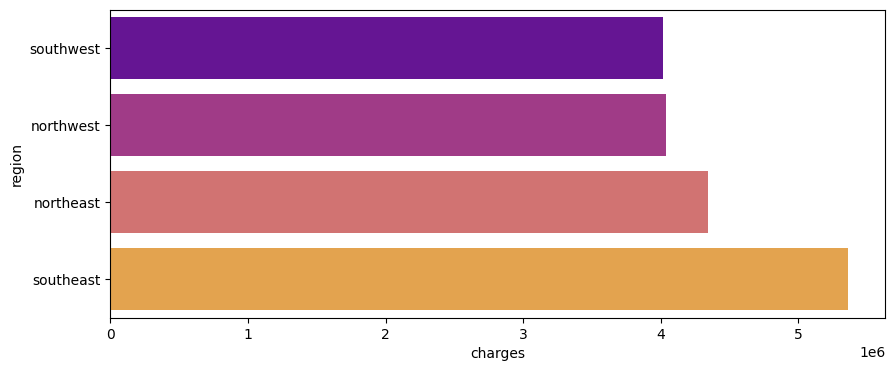

In [8]:
#chargesvsregion
charges = insurance['charges'].groupby(insurance['region']).sum().sort_values(ascending = True)
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 4))
ax2 = sns.barplot(x=charges,y=charges.index, palette='plasma')

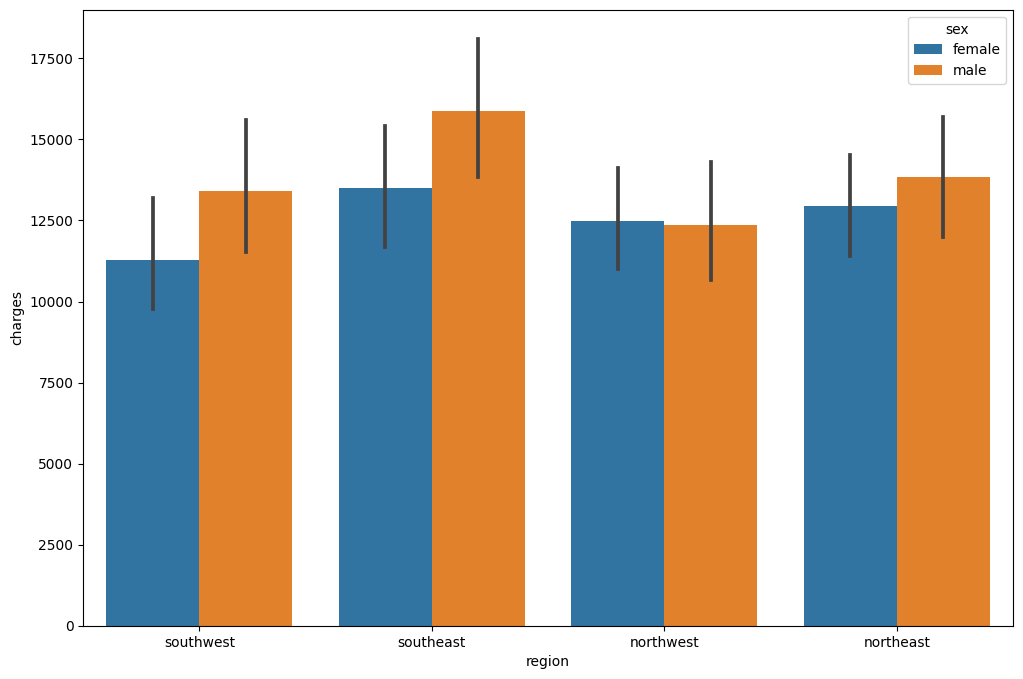

In [9]:
#chargesvsregion with legends sex
fig3, ax3 = plt.subplots(1, 1, figsize=(12, 8))
ax3 = sns.barplot(x='region', y='charges', hue='sex', data=insurance)

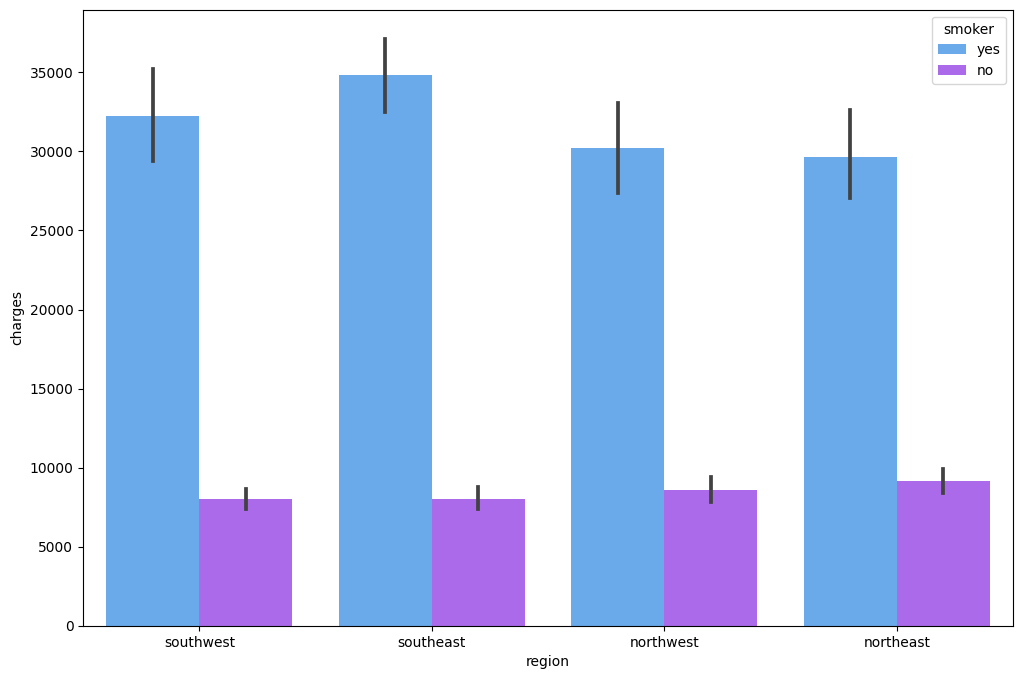

In [10]:
#chargesvsregion with legends smoking
fig4, ax4 = plt.subplots(1,1, figsize=(12,8))
ax4= sns.barplot(x = 'region', y = 'charges', hue='smoker', data=insurance, palette='cool')

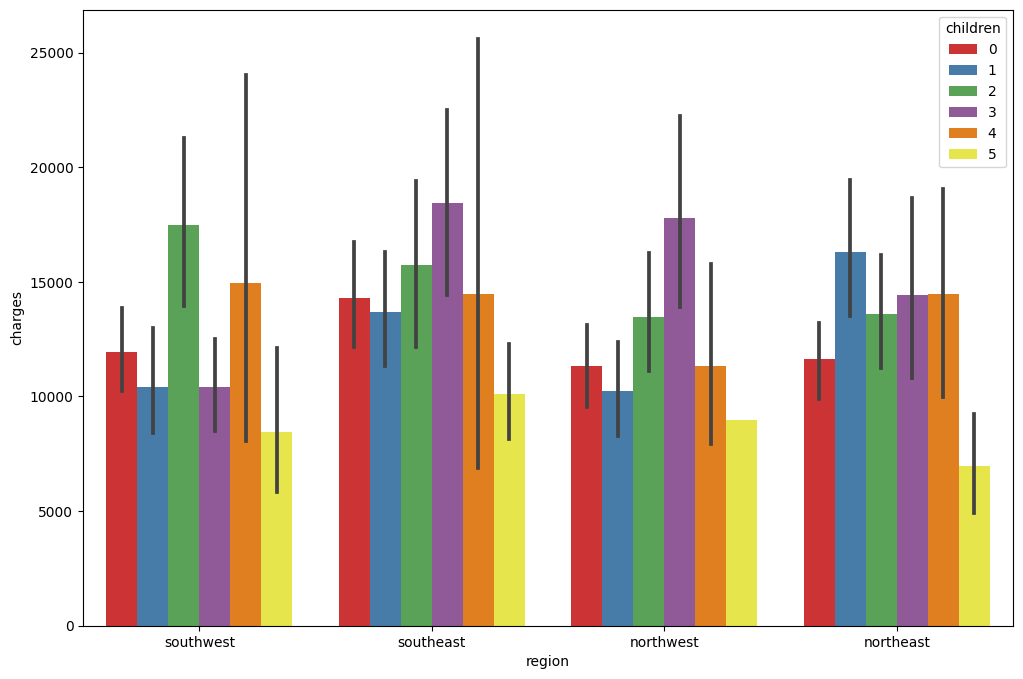

In [11]:
#chargesvsregion with legends children
fig5, ax5 = plt.subplots(1, 1, figsize=(12, 8))
ax5 = sns.barplot(x='region', y='charges', hue='children', data=insurance, palette='Set1')

In [12]:
#Convert objects labels into categorical
insurance[['sex', 'smoker', 'region']] = insurance[['sex', 'smoker', 'region']].astype('category')
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [13]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler
label = LabelEncoder()
insurance['sex']=label.fit_transform(insurance['sex'])
insurance['smoker']=label.fit_transform(insurance['smoker'])
insurance['region']=label.fit_transform(insurance['region'])
insurance.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

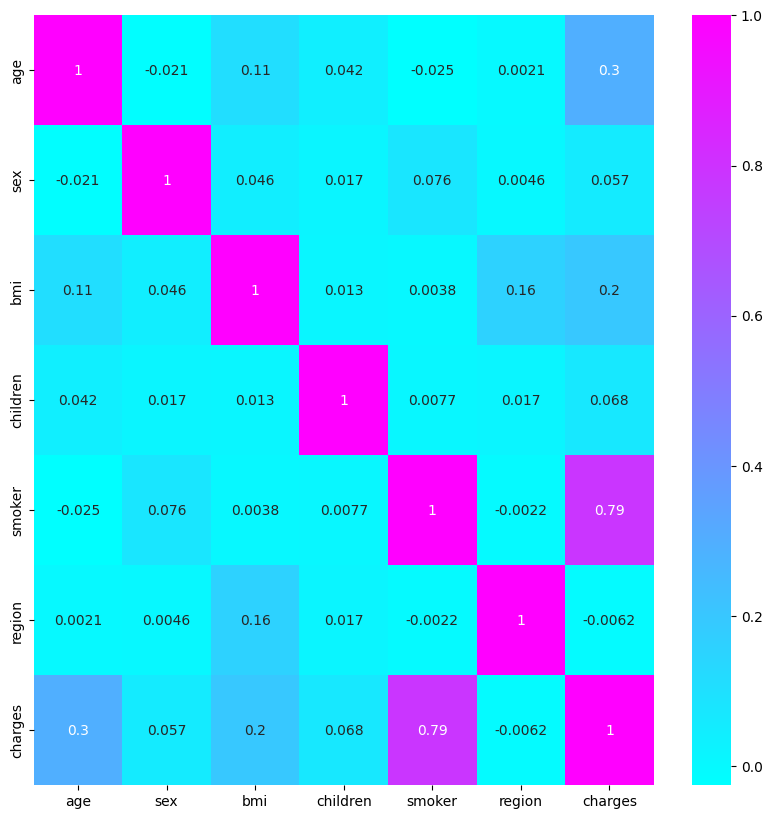

In [14]:
fig6, ax6 = plt.subplots(1, 1, figsize=(10, 10))
ax6 = sns.heatmap(insurance.corr(), annot=True, cmap='cool')
#checking multicollinearity

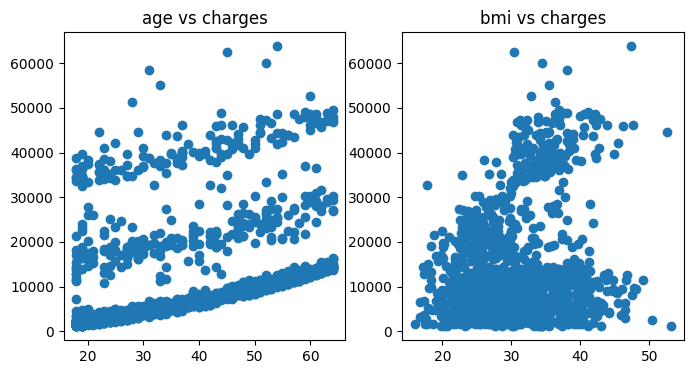

In [15]:
#checking 5 assumptions of linear regression
#linear relationship
fig7,axis7=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
axis7[0].scatter(insurance['age'],insurance['charges'])
axis7[0].set_title('age vs charges')

axis7[1].set_title('bmi vs charges')


axis7[1].scatter(insurance['bmi'],insurance['charges'])


In [16]:
#multicollinearity
#using vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = insurance.drop(['charges'], axis = 1)
y = insurance['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_insurance=pd.DataFrame()
vif_insurance['column']=insurance.columns[0:6]
vif_insurance['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_insurance.sort_values(by='vif',ascending=False)


,column,vif
2,bmi,10.312277
0,age,7.488208
5,region,2.995473
1,sex,1.941573
3,children,1.790091
4,smoker,1.248480


In [17]:
Linear = LinearRegression()
Linear.fit(x_train, y_train)
print(Linear.intercept_)
print(Linear.coef_)
print(Linear.score(x_test, y_test))

-11661.98390882442
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [18]:
#dropping bmi
x=x.drop(['bmi'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_insurance=pd.DataFrame()
vif_insurance['column']=x.columns[0:5]
vif_insurance['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_insurance.sort_values(by='vif',ascending=False)


,column,vif
0,age,3.303261
4,region,2.493462
1,sex,1.827676
2,children,1.755023
3,smoker,1.227696


In [19]:
Linear = LinearRegression()
Linear.fit(x_train, y_train)
print(Linear.intercept_)
print(Linear.coef_)
print(Linear.score(x_test, y_test))


-2715.5743532279757
[ 2.70601623e+02  1.30707599e+02  4.53385107e+02  2.35071042e+04
 -1.70944358e+01]
0.7756382134996443


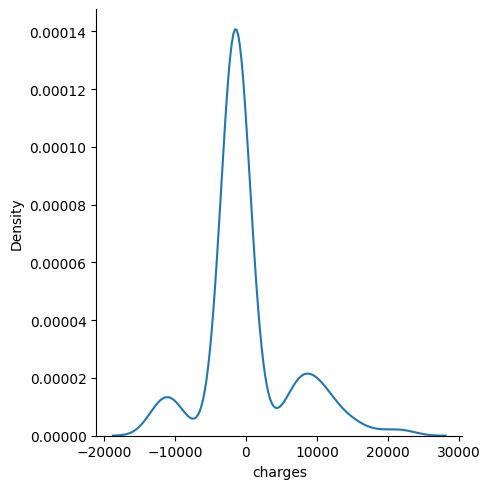

In [20]:
#normal residual
y_pred=Linear.predict(x_test)
residual=y_test-y_pred
sns.displot(residual,kind='kde')

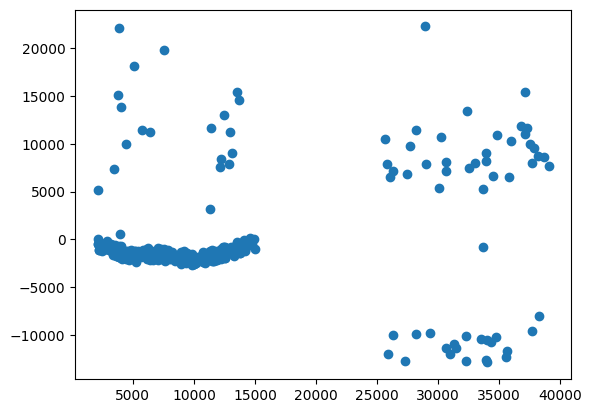

In [21]:
#homoscedasticity
plt.scatter(y_pred,residual)

In [22]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual,x_test)
lzip(name, test)

[('F statistic', 0.7587582289012713), ('p-value', 0.9408894000161067)]

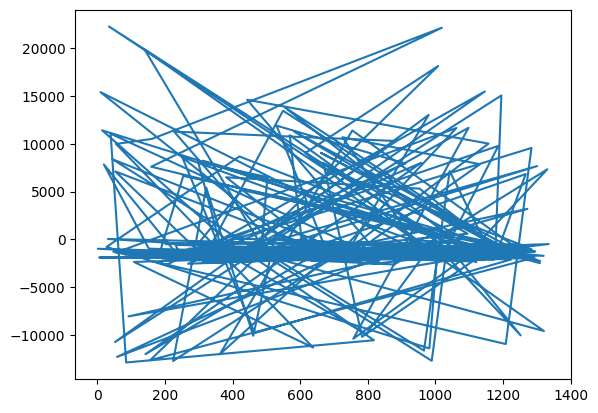

In [23]:
#no auto correlation of error
plt.plot(residual)

In [24]:
from statsmodels.stats.stattools import durbin_watson
  
g = residual
gfg = durbin_watson(g)  
print(gfg)

2.0828802245809723


In [25]:
import statsmodels.api as sma
x_new=sma.add_constant(x)
x_new.head()

,const,age,sex,children,smoker,region
0,1.0,19,0,0,1,3
1,1.0,18,1,1,0,2
2,1.0,28,1,3,0,2
3,1.0,33,1,0,0,1
4,1.0,32,1,0,0,1


In [26]:
import statsmodels.regression.linear_model as sm
from sklearn import metrics
# choose a Significance level usually 0.05, if p>0.05
#  for the highest values parameter, remove that value
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=0)
ols=sm.OLS(endog = y_train, exog = x_train).fit()
params=ols.params
y_pred=ols.predict(x_test)
print(ols.summary())
metrics.r2_score(y_test,y_pred)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     518.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.80e-282
Time:                        20:47:00   Log-Likelihood:                -10905.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1064   BIC:                         2.185e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2715.5744    705.636     -3.848      0.0

0.7756382134996439

In [27]:
x_new=x_new.drop(['sex','region'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=0)
ols=sm.OLS(endog = y_train, exog = x_train).fit()
params=ols.params
y_pred=ols.predict(x_test)
print(ols.summary())
metrics.r2_score(y_test,y_pred)


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     866.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.43e-285
Time:                        20:47:00   Log-Likelihood:                -10905.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1066   BIC:                         2.184e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2678.3764    614.334     -4.360      0.0

0.7756749348964762

In [28]:
#ols and linear regression gives same results
x=x_new.drop(['const'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Linear = LinearRegression()
Linear.fit(x_train, y_train)
print(Linear.intercept_)
print(Linear.coef_)
print(Linear.score(x_test, y_test))

-2678.3764450624203
[  270.54955319   454.08648621 23516.48855518]
0.7756749348964763


In [31]:
# from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Create a linear regression model
model = LinearRegression()

# Specify the number of folds (K) for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=40)

# Perform cross-validation and calculate r2_score as the scoring metric
r2_scores = cross_val_score(model, x, y, cv=k_fold, scoring='r2')

mean_r2_score = r2_scores.mean()

print(mean_r2_score)




0.7210388196809084
